# What the heck am I doing here: an Overview

The first thing a new reader should do is to review the PDF in the attached git repository.

There are three interesting components to this paper. I've included a quote below

"First we show that for a randomly
initialized neural network with sufficiently many
hidden units, the generic gradient descent algo-
rithm learns any low degree polynomial, assum-
ing we initialize the weights randomly. Secondly,
we show that if we use complex-valued weights
(the target function can still be real), then un-
der suitable conditions, there are no “robust lo-
cal minima”: the neural network can always es-
cape a local minimum by performing a random
perturbation. This property does not hold for
real-valued weights. Thirdly, we discuss whether
sparse polynomials can be learned with small
neural networks, with the size dependent on the
sparsity of the target function." - Learning Polynomials with Neural Networks

The goal of the paper was to present some evidence supporting the effectiveness of neural networks, and I wish to further supplement that evidence by investigating some of their claims in this notebook.

## Result 1

We wish to investigate if, "for a randomly initialized neural network with sufficiently many hidden units, the generic gradient descent algorithm learns any low degree polynomial, assuming we initialize the weights randomly."

The most trivial polynomial is the constant zero. However, trying to verify that a neural network can duplicate this result is like trying to use a flamethrower to light a birthday candle.

Recall the universal approximation theorem: 
https://en.wikipedia.org/wiki/Universal_approximation_theorem

If the function we wish to model is constant, I think it follows trivially from this that a neural network is sufficiently powerful. Specifically, setting all the weights and biases to zero, and using any typical, sigmoidal, activation function should do the trick.

Let's use a slightly less trivial example.

f_1(x) = 2x+1



In [1]:
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers
from keras import losses
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


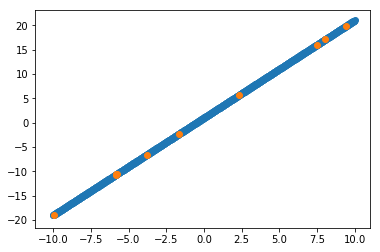

In [2]:
f1 = lambda x: 2*x + 1
xmin = -10
xmax = 10
trainSize = 1000
testSize = 10

def generateSets(f):
    xTrain = np.linspace(xmin,xmax,trainSize)
    yTrain = f(xTrain)
    xTest = np.random.uniform(xmin, xmax, testSize)
    yTest = f(xTest)
    return [[xTrain, yTrain], [xTest, yTest]]

[[x1, y1], [x2, y2]] = generateSets(f1)
plot.scatter(x1,y1)
plot.scatter(x2,y2)
plot.show()

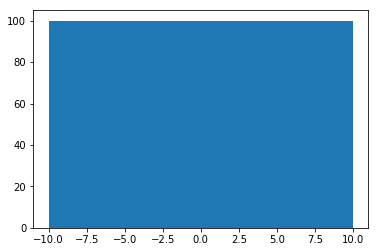

In [3]:
plot.clf()
plot.hist(x1)
plot.show()

In [4]:
model0 = Sequential()
model0.add(Dense(1,input_shape=(1,), kernel_initializer='random_uniform', use_bias=True))
model0.compile(optimizer=optimizers.SGD(), loss=losses.mean_squared_error)
model0.fit(x1,y1)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 5.0875     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.1680     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.0456     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.0034     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 9.2649e-04     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 2.4760e-04     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 6.9747e-05     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 1.9587e-05     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 5.1292e-06     


As the above model0 shows, stochastic gradient descent can, indeed, learn a linear function when acting upon a peceptron. We proceed.

In [5]:
plot.clf()
model = Sequential()
model.add(Dense(1,input_shape= (1,), kernel_initializer='random_uniform' ,use_bias=False))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(2,kernel_initializer='random_uniform', use_bias=True))
model.add(Dense(1,kernel_initializer='random_uniform', use_bias=True))
model.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model.fit(x1,y1)

# plot_model(model)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 134.5771     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 134.5014     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 134.1703     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 129.1448     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 104.2181     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 53.1773     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 11.4461     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 1.0677     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.1927     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.0735     


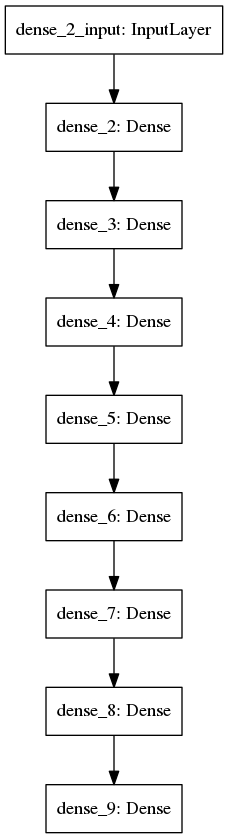

In [6]:
file1 = 'model1.png'
plot_model(model, to_file=file1)
Image(file1)

In [7]:
score = model.evaluate(x2,y2)
print(score)

10/10 [==============================] - 0s
0.0457661449909


Let's try another model

In [8]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,), kernel_initializer='random_uniform', use_bias=True))
model2.add(Dense(1, input_shape=(2,), kernel_initializer='random_uniform', use_bias=True))
model2.compile(optimizer=optimizers.adagrad(), loss=losses.mean_squared_error)
model2.fit(x1,y1)
score2 = model.evaluate(x2,y2)
print(score2)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 132.9686     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 129.7183     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 126.4792     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 123.3440     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 120.2648     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 117.1829     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 114.1943     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 111.2364     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 108.3667     
Epoch 10/10
10/10 [==============================] - 0s
0.0457661449909


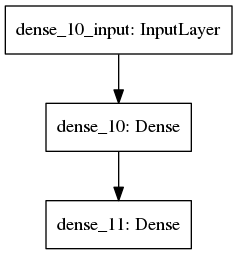

In [9]:
file2 = 'model2.png'
plot_model(model2, to_file=file2)
Image(file2)

Let's see how these models handle a cubic function

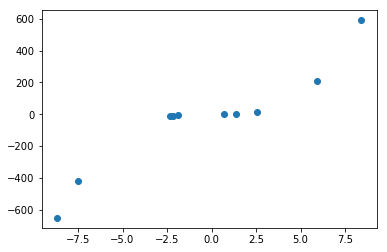

In [10]:
f2 = lambda x: x**3
[[xTrain, yTrain], [xTest, yTest]] = generateSets(f2)
plot.clf()
plot.scatter(xTest,yTest)
plot.show()

In [11]:
model.reset_states()
model.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 126327.7851     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 105461.2114     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 81841.2893     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 59361.8221     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 41206.5443     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 30231.5508     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 25216.1675     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 23640.1070     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 23169.7397     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 23059.4038     - ETA: 0s - loss: 22938.


In [12]:
model1ScoreCubic = model.evaluate(xTest, yTest)
print(model1ScoreCubic)

10/10 [==============================] - 0s
11686.4013672


In [13]:
model2.reset_states()
model2.fit(xTrain, yTrain)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 142519.9473     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 142225.8466     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 142007.8030     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 141815.7600     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 141637.9400     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 141477.2027     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 141320.5870     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 141166.7869     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 141024.4314     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 140885.7369     


In [14]:
model2ScoreCubic = model.evaluate(xTest, yTest)
print(model2ScoreCubic)

10/10 [==============================] - 0s
11686.4013672


# The story so far

Model1 is complex but has a great accuracy. Model2 is simpler with worse accuracy. However, the dilemma is this:
neither are the model that is described in the paper.
Let's proceed by using the specifically defined model from the paper, specifically in Theorem 4.2:

Fix target error epsilon > 0 and degree d >= 1. Suppose the weights alpha are initialized to zero and w_i's are random C(1/(sqrt(n))^n. Assume the number of hidden units is m = Omega(n^6d / epsiolon^3) and the learning rate is lambda <= 1/(4m). Then, given a degree-d polynomial f(x) of unit norm, the gradient descent will converge to a net, which approximates f up to error epsilon. The number of steps required is Oh(n^2d / lambda epsilon^2 m), and the number of samples required is M = m^Oh(1)